<a href="https://colab.research.google.com/github/Vyankatesh-ops/Machine-Learning/blob/main/Exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


First 5 rows of the dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Model training completed successfully!

Confusion Matrix:
[[66  2]
 [ 8 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100

Accuracy: 90.0 %


/tmp/ipython-input-59454079.py:82: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


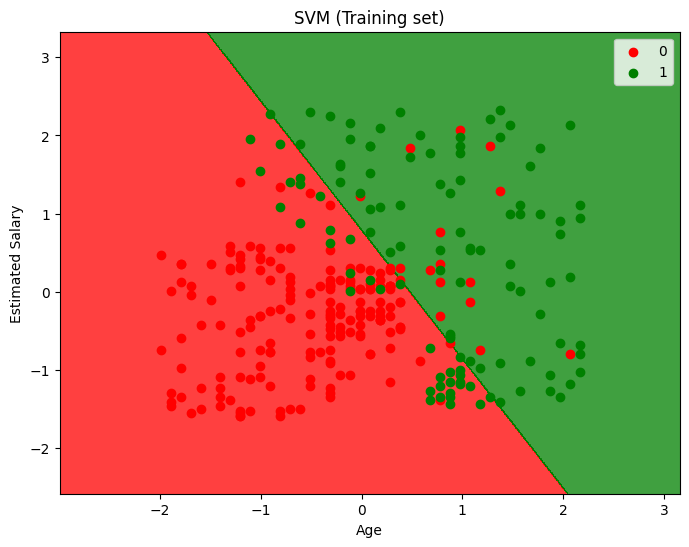

/tmp/ipython-input-59454079.py:112: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


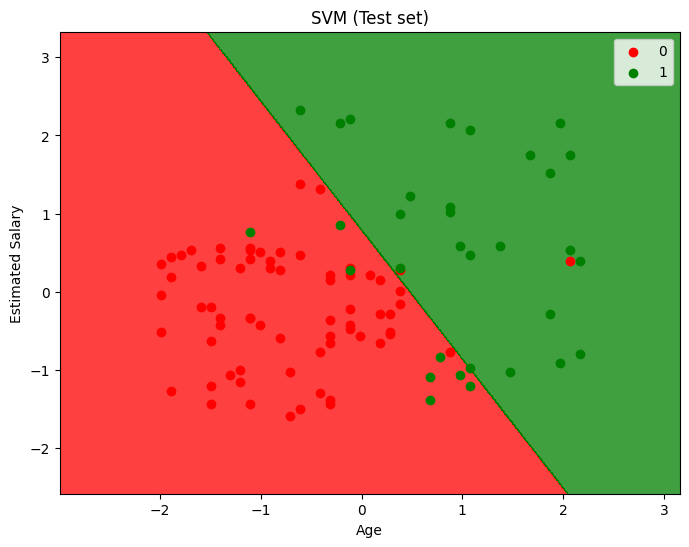

In [1]:
# ============================================
# Support Vector Machine (SVM) Classification
# ============================================

# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# ============================================
# Step 1: Load the dataset
# ============================================
datasets = pd.read_csv('Social_Network_Ads.csv')
print("\nFirst 5 rows of the dataset:")
print(datasets.head())

# Select features and target
X = datasets.iloc[:, [2, 3]].values   # Age, Estimated Salary
Y = datasets.iloc[:, 4].values        # Purchased (0 or 1)

# ============================================
# Step 2: Split into Training and Test sets
# ============================================
X_Train, X_Test, Y_Train, Y_Test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

# ============================================
# Step 3: Feature Scaling
# ============================================
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# ============================================
# Step 4: Train the SVM Classifier
# ============================================
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_Train, Y_Train)
print("\nModel training completed successfully!")

# ============================================
# Step 5: Predict the Test results
# ============================================
Y_Pred = classifier.predict(X_Test)

# Evaluate model performance
print("\nConfusion Matrix:")
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

print("\nClassification Report:")
print(classification_report(Y_Test, Y_Pred))

print("Accuracy:", round(accuracy_score(Y_Test, Y_Pred) * 100, 2), "%")

# ============================================
# Step 6: Visualize the Training Set Results
# ============================================
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(
    np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01)
)

plt.figure(figsize=(8,6))
plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# ============================================
# Step 7: Visualize the Test Set Results
# ============================================
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(
    np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01)
)

plt.figure(figsize=(8,6))
plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(
        X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
        c=ListedColormap(('red', 'green'))(i), label=j
    )
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
